In [3]:
%pip install fastai
from fastai.vision.all import *
from pathlib import Path


Note: you may need to restart the kernel to use updated packages.


In [8]:
path = untar_data(URLs.PETS)/'images'
print(path)


/Users/praveen/.fastai/data/oxford-iiit-pet/images


In [5]:
def is_cat(x): return x[0].isupper()


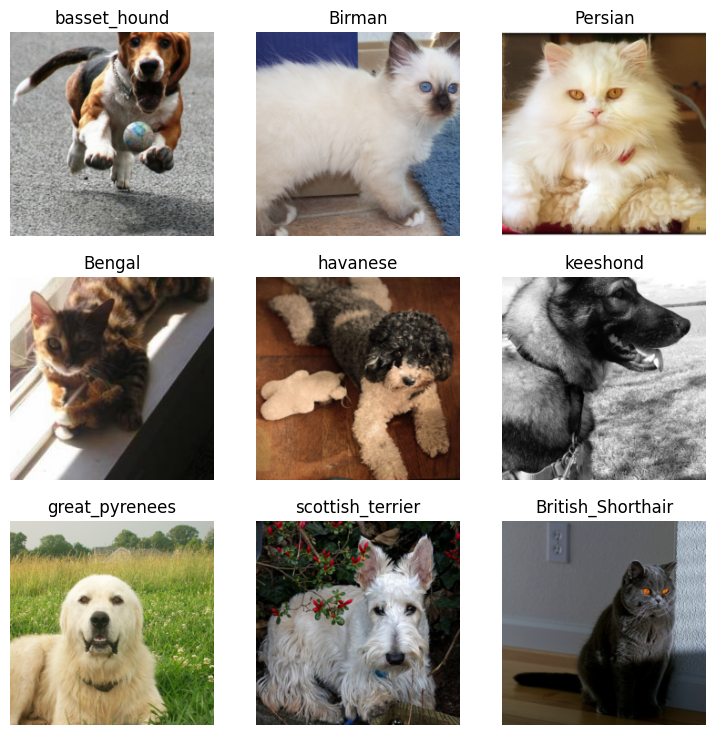

In [9]:


# Modern DataBlock approach
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(224)
)
# Create DataLoaders
dls = dblock.dataloaders(path)

# Show a batch to verify it works
dls.show_batch()
